<a href="https://colab.research.google.com/github/tranhauhuan452005/BTL-OOP/blob/main/CNTT_1701_Tr%E1%BA%A7n_H%E1%BA%ADu_Hu%C3%A2n_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# 1️⃣ Đọc file Excel
file_path = "/content/CNTT-1701_Trần Hậu Huân_BKT2.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ Xử lý dữ liệu bị thiếu
df["Tình trạng ngập úng"].fillna("Không rõ", inplace=True)
df["Nguyên nhân"].fillna("Không xác định", inplace=True)
df["Biện pháp xử lý"].fillna("Chưa có", inplace=True)

df["Độ sâu ngập úng (cm)"].fillna(0, inplace=True)  # Mặc định là 0 nếu thiếu
df["Diện tích ngập úng (m2)"].fillna(0, inplace=True)

# Xử lý cột thiệt hại, chuyển về dạng số và điền 0 nếu thiếu
df["Thiệt hại ước tính (VNĐ)"] = pd.to_numeric(df["Thiệt hại ước tính (VNĐ)"], errors="coerce")
df["Thiệt hại ước tính (VNĐ)"].fillna(0, inplace=True)

# 3️⃣ Xử lý ngày tháng
df["Ngày/Giờ"] = pd.to_datetime(df["Ngày/Giờ"], errors="coerce")
df["Ngày/Giờ"].fillna(method="ffill", inplace=True)  # Điền bằng giá trị trước đó nếu thiếu

# 4️⃣ Xử lý dữ liệu trùng lặp
df.drop_duplicates(inplace=True)

# 5️⃣ Lưu lại file Excel đã làm sạch
cleaned_file_path = "/content/CNTT-1701_Trần Hậu Huân_BKT2.xlsx"
df.to_excel(cleaned_file_path, index=False)

print("✔ Dữ liệu đã được làm sạch và lưu vào:", cleaned_file_path)


✔ Dữ liệu đã được làm sạch và lưu vào: /content/CNTT-1701_Trần Hậu Huân_BKT2.xlsx


<ipython-input-7-93cb82e550d4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tình trạng ngập úng"].fillna("Không rõ", inplace=True)
<ipython-input-7-93cb82e550d4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

📌 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Ngày/Giờ                  10 non-null     datetime64[ns]
 1   Địa điểm                  10 non-null     object        
 2   Lượng mưa (mm)            10 non-null     int64         
 3   Tình trạng ngập úng       10 non-null     object        
 4   Độ sâu ngập úng (cm)      10 non-null     object        
 5   Diện tích ngập úng (m2)   10 non-null     object        
 6   Nguyên nhân               10 non-null     object        
 7   Thiệt hại ước tính (VNĐ)  10 non-null     int64         
 8   Biện pháp xử lý           10 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
None

📌 Thống kê mô tả dữ liệu số:
                  Ngày/Giờ  Lượng mưa (mm)  Thiệt hại ước tính (VNĐ)
count             

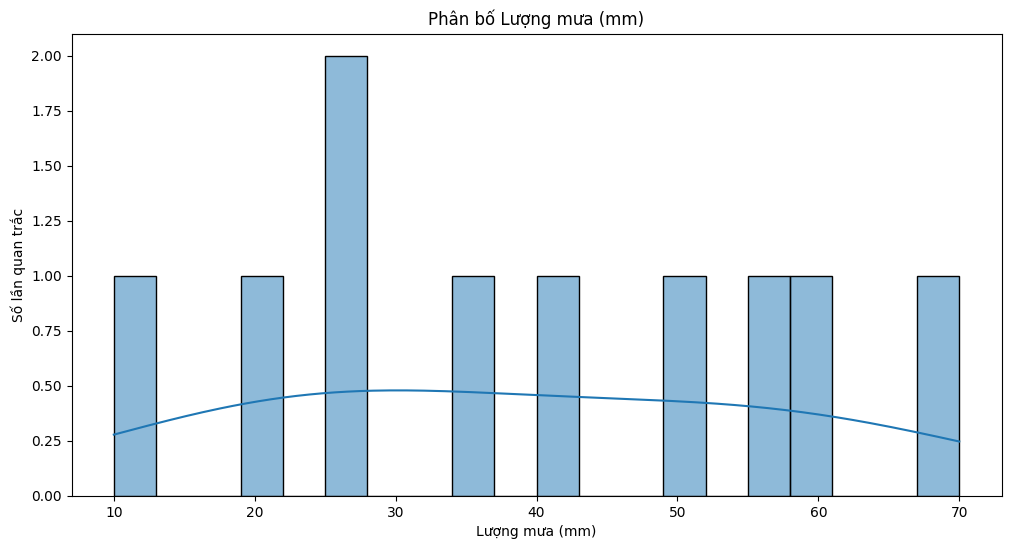

<ipython-input-8-d31695784211>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_khu_vuc.values, y=top_khu_vuc.index, palette="viridis")


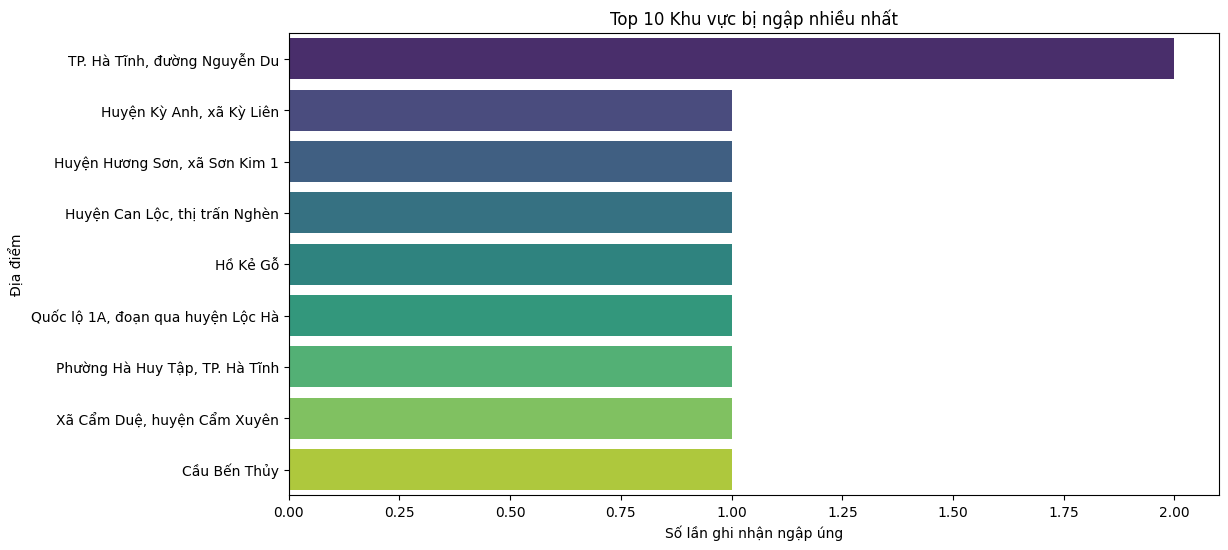

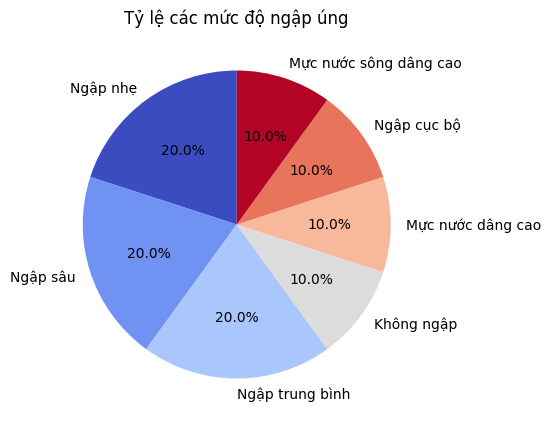

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Đọc file Excel sau khi làm sạch
file_path = "/content/CNTT-1701_Trần Hậu Huân_BKT2.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ Hiển thị thông tin tổng quát về dữ liệu
print("📌 Thông tin dữ liệu:")
print(df.info())  # Kiểm tra kiểu dữ liệu và dữ liệu bị thiếu

print("\n📌 Thống kê mô tả dữ liệu số:")
print(df.describe())  # Thống kê dữ liệu số

# 3️⃣ Kiểm tra dữ liệu bị thiếu
print("\n📌 Số lượng dữ liệu thiếu mỗi cột:")
print(df.isnull().sum())

# 4️⃣ Biểu đồ phân bố lượng mưa
plt.figure(figsize=(12, 6))
sns.histplot(df["Lượng mưa (mm)"], bins=20, kde=True)
plt.title("Phân bố Lượng mưa (mm)")
plt.xlabel("Lượng mưa (mm)")
plt.ylabel("Số lần quan trắc")
plt.show()

# 5️⃣ Biểu đồ các khu vực có tình trạng ngập úng nhiều nhất
top_khu_vuc = df["Địa điểm"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_khu_vuc.values, y=top_khu_vuc.index, palette="viridis")
plt.title("Top 10 Khu vực bị ngập nhiều nhất")
plt.xlabel("Số lần ghi nhận ngập úng")
plt.ylabel("Địa điểm")
plt.show()

# 6️⃣ Biểu đồ tỷ lệ tình trạng ngập úng
plt.figure(figsize=(8, 5))
df["Tình trạng ngập úng"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="coolwarm")
plt.title("Tỷ lệ các mức độ ngập úng")
plt.ylabel("")  # Ẩn nhãn trục y
plt.show()


Phương trình hồi quy: y = 0.00 + 0.00x
Hệ số chặn (beta_0): 0.0
Hệ số dốc (beta_1): 0.0
Hệ số xác định (R^2): 1.0
Sai số bình phương trung bình (MSE): 0.0


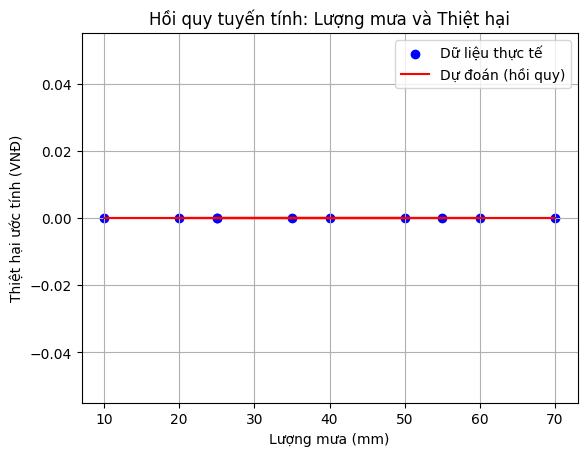

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Đọc file Excel
file_path = "/content/CNTT-1701_Trần Hậu Huân_BKT2.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ Xử lý dữ liệu, loại bỏ dòng có giá trị NaN
df = df[["Lượng mưa (mm)", "Thiệt hại ước tính (VNĐ)"]].dropna()

# 3️⃣ Tách biến độc lập (X) và phụ thuộc (y)
X = df["Lượng mưa (mm)"].values.reshape(-1, 1)
y = df["Thiệt hại ước tính (VNĐ)"].values

# 4️⃣ Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# 5️⃣ Dự đoán giá trị
y_pred = model.predict(X)

# 6️⃣ Tính toán các hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số dốc

# 7️⃣ Đánh giá mô hình
r2 = r2_score(y, y_pred)  # Hệ số xác định R^2
mse = mean_squared_error(y, y_pred)  # Sai số bình phương trung bình (MSE)

# 8️⃣ Hiển thị kết quả
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (beta_0): {beta_0}")
print(f"Hệ số dốc (beta_1): {beta_1}")
print(f"Hệ số xác định (R^2): {r2}")
print(f"Sai số bình phương trung bình (MSE): {mse}")

# 9️⃣ Vẽ biểu đồ
plt.scatter(X, y, color="blue", label="Dữ liệu thực tế")
plt.plot(X, y_pred, color="red", label="Dự đoán (hồi quy)")
plt.title("Hồi quy tuyến tính: Lượng mưa và Thiệt hại")
plt.xlabel("Lượng mưa (mm)")
plt.ylabel("Thiệt hại ước tính (VNĐ)")
plt.legend()
plt.grid(True)
plt.show()
